# Predicting when a user agrees to rate the app

For my final project, I am using real data from my work at GSN Games, a mobile gaming company, to predict when a user will agree to rate the app.  The name of the app is Solitaire TriPeaks.

When a user installs the app and reaches Level 30, they are shown a dialog asking them to rate the App.  Since nearly all users who agree to rate the app give it a positive rating, we can potentially increase the number of ratings by surfacing the dialog at a time when we predict that the user will mostly likely agree to rate the app.

For my dataset, I included all users who installed the game between June 1, 2017 and May 31, 2018.  The total number of users (and therefore rows) is ~2.4M.

The following is a description of the columns in my dataset:
* **synthetic_id**:  This is the unique identifier of the user
* **red_stars**:  This is a measure of the user's engagement.  The more red stars, the higher the engagement.  The values range from 0-6
* **joined_club**:  This is a binary which indicates whether the user has joined a club.  Clubs are feature in the game that allows the user to collaborate with other users.  
* **tenure**:  This is the number of days between the time that the user installed the game and when they were asked to rate the game
* **payer**:  This is a binary which indicates whether the user has paid real money in the game.
* **win_loss**:  This is the user's win/loss percentage in games played immediately prior to being asked to rate the game.
* **rated_app**:  This is what we are trying to predict.  It is a binary indicating whether the user agreed to rate the app.

In [6]:
import pandas as pd
%matplotlib inline

In [3]:
# Import the dataset from dropbox to a dataframe.
df = pd.read_csv('https://www.dropbox.com/s/xugzktmpkvniuyl/data_export_all.csv?dl=1')

In [4]:
df.head()

,synthetic_id,red_stars,joined_club,tenure,payer,win_loss,rated_app
0,000053a0-1f3e-401a-84f9-9579c023b13e,3,1,5,0,28,0
1,0001cc24-31a7-4bbc-bdf3-7bc1bcf874fa,2,1,6,0,36,1
2,000222f9-6962-4c85-a428-4bbd5377efea,0,0,0,0,41,1
3,00030a10-2e0e-402d-afd0-d24c4f229541,0,1,3,0,43,0
4,00031460-4be6-43a7-ac82-9c975a0d74a8,0,1,52,0,82,0


In [5]:
df.shape

(2429373, 7)

In [7]:
df.describe(include = 'all')

,synthetic_id,red_stars,joined_club,tenure,payer,win_loss,rated_app
count,2429373,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06,2.429373e+06
unique,2429373,NaN,NaN,NaN,NaN,NaN,NaN
top,d6dd224a-713b-44e7-a2f5-8cc2765853e4,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.867256e-01,7.486500e-01,1.181892e+01,2.270709e-02,4.551437e+01,1.896765e-01
std,NaN,1.221083e+00,4.337894e-01,3.280495e+01,1.489681e-01,1.879203e+01,3.920451e-01
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.200000e+01,0.000000e+00
50%,NaN,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,4.100000e+01,0.000000e+00
75%,NaN,2.000000e+00,1.000000e+00,8.000000e+00,0.000000e+00,5.600000e+01,0.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dda6c50>]],
      dtype=object)

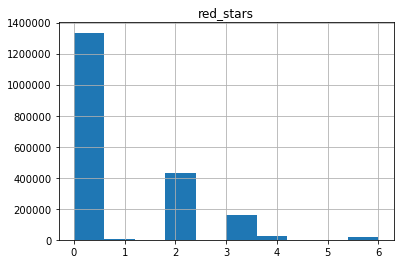

In [8]:
df[(df.rated_app == 0)].hist(column='red_stars')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dda61d0>]],
      dtype=object)

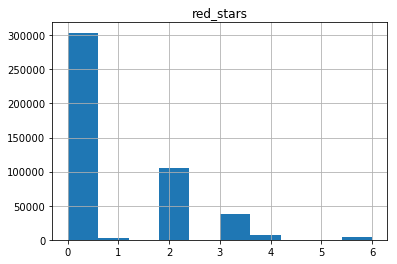

In [9]:
df[(df.rated_app == 1)].hist(column='red_stars') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ef181d0>]],
      dtype=object)

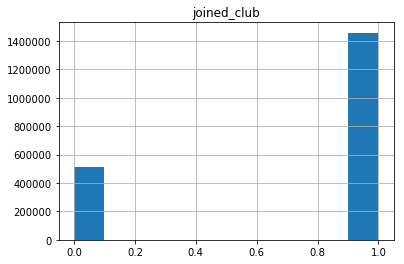

In [10]:
df[(df.rated_app == 0)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d7f5710>]],
      dtype=object)

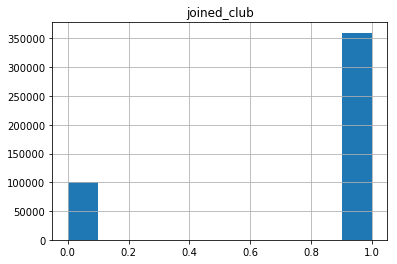

In [11]:
df[(df.rated_app == 1)].hist(column='joined_club') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f12fdd8>]],
      dtype=object)

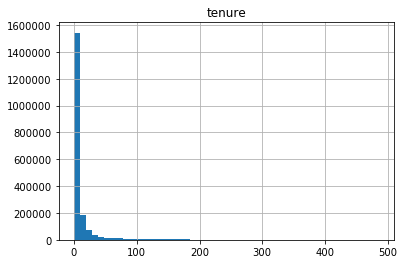

In [12]:
df[(df.rated_app == 0)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f319668>]],
      dtype=object)

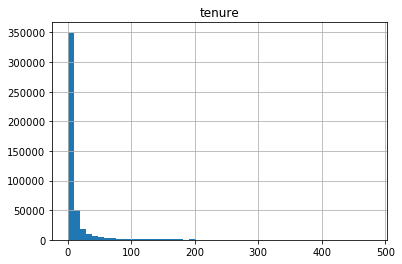

In [13]:
df[(df.rated_app == 1)].hist(column='tenure', bins = 50) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f41ef98>]],
      dtype=object)

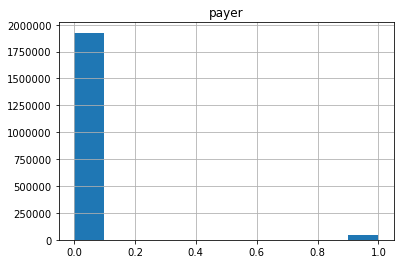

In [14]:
df[(df.rated_app == 0)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f6249e8>]],
      dtype=object)

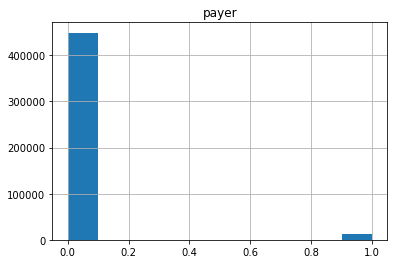

In [15]:
df[(df.rated_app == 1)].hist(column='payer') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dedbd30>]],
      dtype=object)

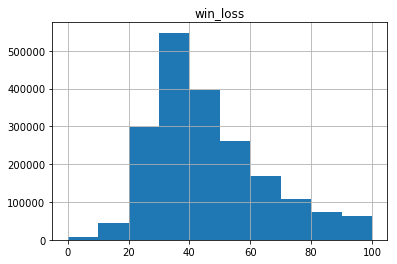

In [16]:
df[(df.rated_app == 0)].hist(column='win_loss')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e177eb8>]],
      dtype=object)

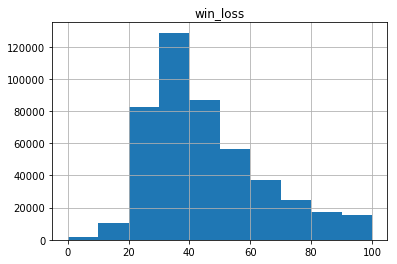

In [17]:
df[(df.rated_app == 1)].hist(column='win_loss') 